In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

Tendencia é igual a direção, ou seja, para onde os dados estão indo, exemplos: Lucros de uma empresa.


Sazonalidade é a recorrência das oscilações.


Resíduo é o que sobra do sinal.

In [23]:
df_path = "https://raw.githubusercontent.com/carlosfab/datasets/master/electricity_consumption/Electric_Production.csv"
df = pd.read_csv(df_path)

In [24]:
df.head()

,DATE,Value
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [25]:
df.tail()

,DATE,Value
392,09-01-2017,98.6154
393,10-01-2017,93.6137
394,11-01-2017,97.3359
395,12-01-2017,114.7212
396,01-01-2018,129.4048


In [26]:
df.shape

(397, 2)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


In [28]:
df.index = pd.to_datetime(df["DATE"], format = "%m-%d-%Y")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 397 entries, 1985-01-01 to 2018-01-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    397 non-null    object 
 1   Value   397 non-null    float64
dtypes: float64(1), object(1)
memory usage: 9.3+ KB


In [30]:
df.drop("DATE", inplace=True, axis=1)

In [31]:
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [32]:
df.loc['1986-06-01']

Value    59.9005
Name: 1986-06-01 00:00:00, dtype: float64

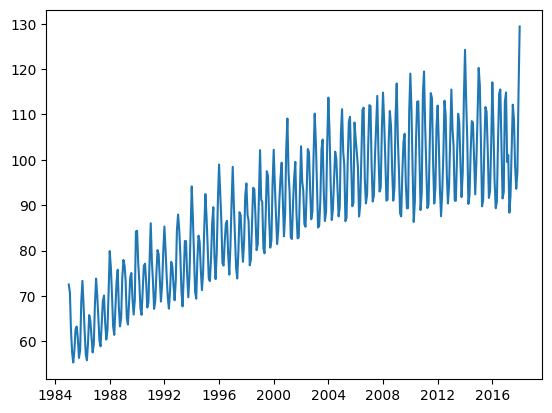

In [35]:
plt.plot(df.index, df["Value"])

In [36]:
resultados = seasonal_decompose(df)

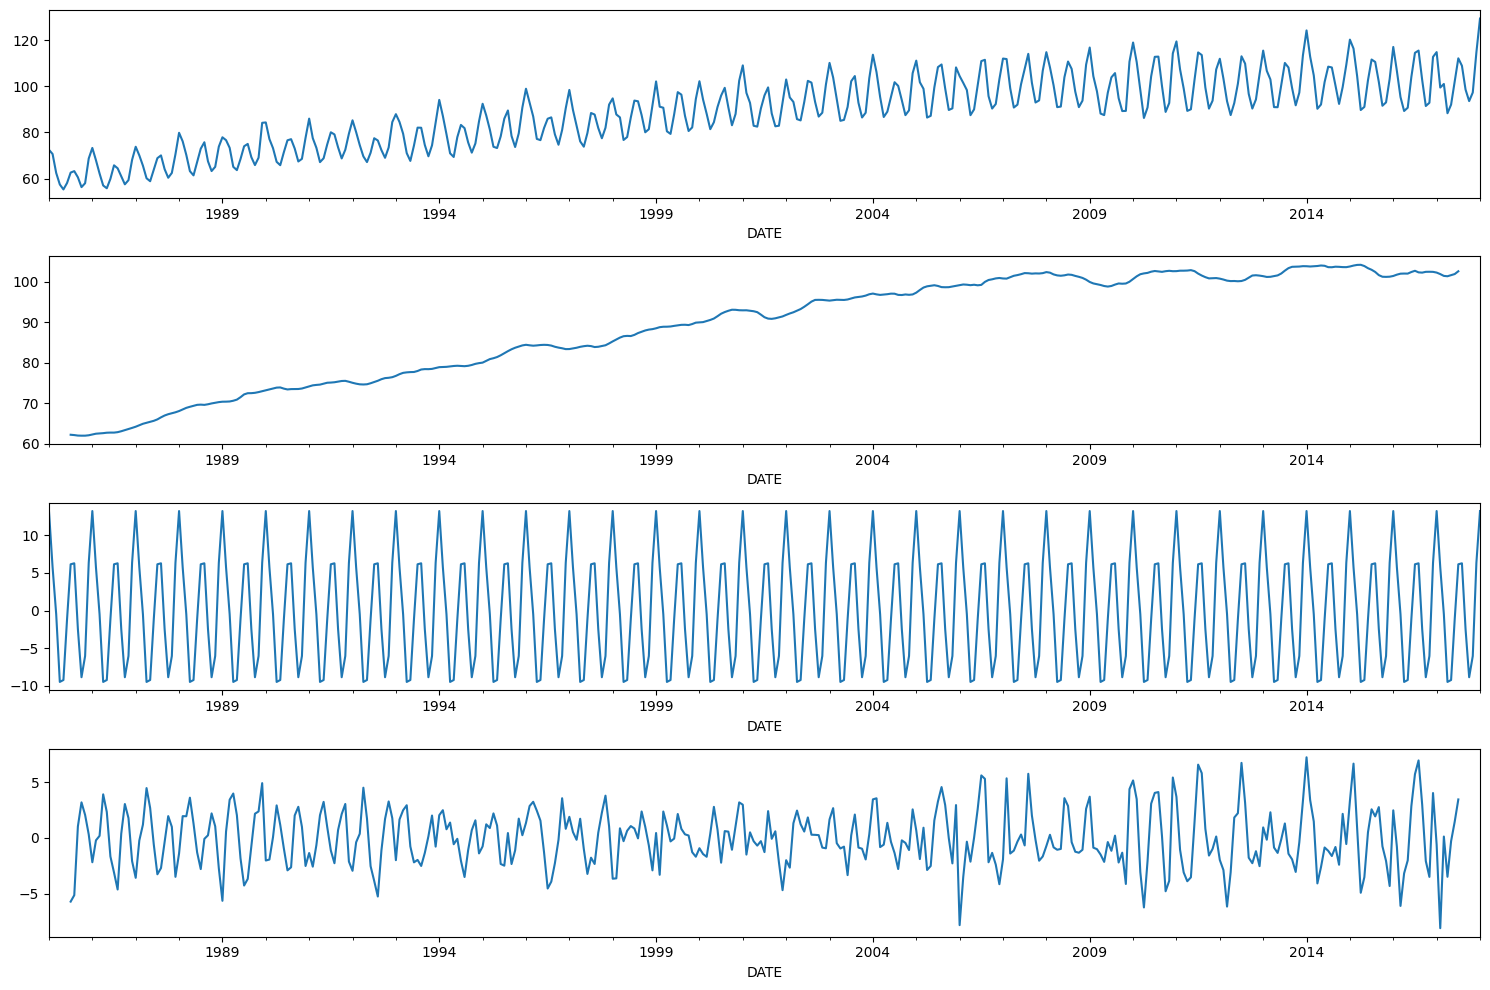

In [41]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()